# 📊 Análise Exploratória de Dados (EDA) — Dataset de Crédito  
### Trabalho Final de Mineração de Dados

Este notebook tem como objetivo realizar uma **Análise Exploratória de Dados (EDA)** sobre um conjunto de informações de clientes solicitantes de crédito.  
O foco é compreender **como diferentes características dos clientes** influenciam a probabilidade de inadimplência (variável-alvo).

### ⭐ Objetivos da Análise

1. Limpar e preparar o conjunto de dados.  
2. Explorar relações entre a variável alvo e os atributos:
   - Sexo
   - Estado civil
   - Quantidade de dependentes
   - Nível educacional
3. Analisar:
   - A distribuição de bons e maus pagadores por estado.
   - A influência do tipo de residência.
   - Como renda pessoal e outras rendas se relacionam com o alvo.
   - A influência da idade na inadimplência.
4. Criar visualizações claras e interpretar cada resultado.

### ⭐ Divisão
Anna Isabelle - Limpou e preparou o dataset, além de explorar as variáveis relacionadas ao alvo. (1,2)

César Rodrigues - Realizou a análise final dos dados e escreveu as conclusões da EDA. (4)

Evily Maria - Desenvolveu as análises detalhadas de cada aspecto investigado. (3)

### ⭐ Fonte do Dataset
O dataset utilizado está disponível publicamente no repositório do professor Diogenes Justo:

https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv

---




### Imports e Configurações

In [2]:
# Instala a versão estável do Seaborn no Colab (às vezes vem desatualizado)
!pip install -q seaborn==0.12.2

# Importação das bibliotecas principais
import pandas as pd      # manipulação de dados
import numpy as np       # operações numéricas
import seaborn as sns    # gráficos estatísticos
import matplotlib.pyplot as plt  # gráficos tradicionais

# Configurações visuais para os gráficos
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)  # tamanho padrão dos gráficos


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.4 MB/s eta 0:00:00




---

### Carregar Dataset


In [3]:
# URL onde o dataset está hospedado
url = "https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv"

df = pd.read_csv(url, sep="\t", encoding="latin1")
df.head()



/tmp/ipython-input-3304631256.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep="\t", encoding="latin1")


,1,C,5,Web,0,1.1,F,6,1.2,0.1,...,0.11,0.12,0.13,0.14,1.8,N.3,32,595,595.1,1.9
0,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
1,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
2,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
3,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
4,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1




---

### Inspeção Inicial

In [4]:
# Verificação de quantas colunas existem
len(df.columns)


54

In [5]:
colunas_54 = [
    "ID_CLIENTE", "SEGMENTO", "NIVEL_EDUCACIONAL", "TIPO_PRODUTO", "FLAG_MATRIZ",
    "FLAG_DEPENDENTE", "SEXO", "ESTADO_CIVIL", "QUANT_DEPENDENTES", "FLAG_RESIDENCIA_PROPRIA",
    "ESTADO_RESIDENCIAL", "CIDADE_RESIDENCIAL", "FLAG_TRABALHO", "ESTADO_TRABALHO",
    "CIDADE_TRABALHO", "BAIRRO_TRABALHO", "TIPO_RESIDENCIA", "FLAG_MORADIA",
    "TEMPO_RESIDENCIA", "TEMPO_TRABALHO", "ESCOLARIDADE_CONJUGE", "FLAG_POSSUI_CONJUGE",
    "RENDA_PESSOAL_MENSAL", "OUTRAS_RENDAS", "FLAG_CARTAO_CREDITO", "FLAG_CHEQUE",
    "FLAG_CHEQUE_ESPECIAL", "FLAG_CREDITO_CONSIGNADO", "FLAG_EMPRESTIMO",
    "FLAG_FINANCIAMENTO", "FLAG_PENSAO", "FLAG_APOSENTADORIA", "FLAG_RENDA_INFORMAL",
    "FLAG_PROGRAMAS_SOCIAIS", "FLAG_CONTAS_CONJUNTAS", "FLAG_OUTROS_CARTOES",
    "FLAG_OUTROS_BANCOS", "FLAG_DIVIDA_ATRASADA", "FLAG_CONSULTA_SPC",
    "FLAG_CONSULTA_SERASA", "FLAG_RENEGOCIACAO", "FLAG_LIMITE_ESPECIAL",
    "FLAG_REFINANCIAMENTO", "FLAG_BAIXA_RENDA", "FLAG_ALTO_RISCO",
    "FLAG_ASSINATURA_JURIDICA", "FLAG_EMPREGO_ESTAVEL", "FLAG_TEMPO_CONTA",
    "FLAG_BAIXO_MOVIMENTO", "FLAG_RECEBE_SALARIO", "IDADE",
    "MESES_RESIDENCIA", "MESES_NO_TRABALHO", "ROTULO_ALVO_MAU"
]

df.columns = colunas_54

df.head()

,ID_CLIENTE,SEGMENTO,NIVEL_EDUCACIONAL,TIPO_PRODUTO,FLAG_MATRIZ,FLAG_DEPENDENTE,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,FLAG_RESIDENCIA_PROPRIA,...,FLAG_ALTO_RISCO,FLAG_ASSINATURA_JURIDICA,FLAG_EMPREGO_ESTAVEL,FLAG_TEMPO_CONTA,FLAG_BAIXO_MOVIMENTO,FLAG_RECEBE_SALARIO,IDADE,MESES_RESIDENCIA,MESES_NO_TRABALHO,ROTULO_ALVO_MAU
0,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
1,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
2,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
3,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
4,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1


In [6]:
# Mostra os tipos de dados de cada coluna
df.info()

# Estatísticas básicas para cada coluna (números e categorias)
df.describe(include='all').T

# Mostra as colunas com mais dados faltantes
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_CLIENTE                49999 non-null  int64  
 1   SEGMENTO                  49999 non-null  object 
 2   NIVEL_EDUCACIONAL         49999 non-null  int64  
 3   TIPO_PRODUTO              49999 non-null  object 
 4   FLAG_MATRIZ               49999 non-null  int64  
 5   FLAG_DEPENDENTE           49999 non-null  int64  
 6   SEXO                      49999 non-null  object 
 7   ESTADO_CIVIL              49999 non-null  int64  
 8   QUANT_DEPENDENTES         49999 non-null  int64  
 9   FLAG_RESIDENCIA_PROPRIA   49999 non-null  int64  
 10  ESTADO_RESIDENCIAL        49999 non-null  object 
 11  CIDADE_RESIDENCIAL        49999 non-null  object 
 12  FLAG_TRABALHO             49999 non-null  int64  
 13  ESTADO_TRABALHO           49999 non-null  object 
 14  CIDADE

,0
FLAG_OUTROS_BANCOS,33782
FLAG_OUTROS_CARTOES,33782
FLAG_BAIXA_RENDA,32337
FLAG_REFINANCIAMENTO,28883
FLAG_RENEGOCIACAO,7756
FLAG_LIMITE_ESPECIAL,7313
TEMPO_TRABALHO,3777
TEMPO_RESIDENCIA,1349
FLAG_DEPENDENTE,0
FLAG_MATRIZ,0




---

### Limpeza Inicial

In [7]:
num_cols = [
    "RENDA_PESSOAL_MENSAL", "OUTRAS_RENDAS",
    "IDADE", "MESES_RESIDENCIA", "MESES_NO_TRABALHO"
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")


df["ROTULO_ALVO_MAU"] = df["ROTULO_ALVO_MAU"].fillna(0)
df["ROTULO_ALVO_MAU"] = df["ROTULO_ALVO_MAU"].astype(int)

df["ROTULO_ALVO_MAU"].value_counts()

df["TIPO_RESIDENCIA"] = df["TIPO_RESIDENCIA"].astype(str).str.strip().str.upper()
df["TIPO_RESIDENCIA"].value_counts()

,count
TIPO_RESIDENCIA,
Y,41808
N,8191


---

### Função Auxiliar para Categorias

In [8]:
def cat_summary(col):
    # Título da análise
    print(f"\n### Analisando: {col}\n")

    # Tabela simples de frequências
    tab = pd.crosstab(df[col], df[alvo_col])

    # Tabela percentual por categoria
    tab_pct = pd.crosstab(df[col], df[alvo_col], normalize='index') * 100

    # Exibe as duas tabelas
    display(tab)
    display(tab_pct.round(2))

    # Gráfico de barras empilhadas mostrando percentual de bons e maus pagadores
    (tab_pct
     .rename(columns={0: "Bom (%)", 1: "Mau (%)"})
     .plot(kind="bar", stacked=True))

    plt.title(f"Percentual de Bons e Maus Pagadores por {col}")
    plt.ylabel("Percentual (%)")
    plt.show()




---

### Sexo, Estado Civil, Dependentes e Escolaridade


In [9]:
def cat_summary(col):
    print(f"\n\n📌 Analisando coluna: {col}\n")

    # Garante que a coluna exista
    if col not in df.columns:
        print(f"⚠ A coluna '{col}' não existe no DataFrame.")
        return

    # Converte para string para evitar erro em categorias inesperadas
    df[col] = df[col].astype(str).str.strip()

    # Exibe valores únicos (até 20)
    print("Valores únicos:", df[col].unique()[:20])

    # Tabela de frequências
    tab = pd.crosstab(df[col], df["ROTULO_ALVO_MAU"])
    display(tab)

    # Tabela percentual
    tab_pct = pd.crosstab(df[col], df["ROTULO_ALVO_MAU"], normalize='index') * 100
    display(tab_pct.round(2))

    # Gráfico
    plt.figure(figsize=(10,5))
    (tab_pct
     .rename(columns={0: "Bom (%)", 1: "Mau (%)"})
     .plot(kind="bar", stacked=True, figsize=(10,5)))

    plt.title(f"Distribuição de Bons e Maus Pagadores por {col}")
    plt.ylabel("Percentual (%)")
    plt.xticks(rotation=45)
    plt.legend(title="Alvo")
    plt.tight_layout()
    plt.show()





📌 Analisando coluna: SEXO

Valores únicos: ['F' 'M' 'N' '']


ROTULO_ALVO_MAU,0,1
SEXO,,
,10,7
F,23015,7789
M,13902,5228
N,32,16


ROTULO_ALVO_MAU,0,1
SEXO,,
,58.82,41.18
F,74.71,25.29
M,72.67,27.33
N,66.67,33.33


<Figure size 1000x500 with 0 Axes>

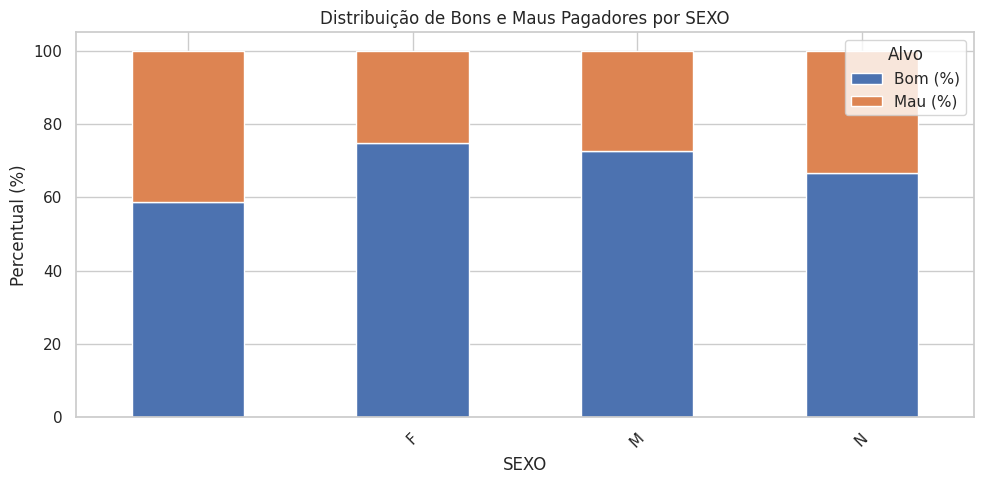



📌 Analisando coluna: ESTADO_CIVIL

Valores únicos: ['2' '1' '5' '3' '7' '4' '6' '0']


ROTULO_ALVO_MAU,0,1
ESTADO_CIVIL,,
0,147,55
1,10631,4655
2,19690,6277
3,493,139
4,3309,897
5,967,329
6,1330,546
7,392,142


ROTULO_ALVO_MAU,0,1
ESTADO_CIVIL,,
0,72.77,27.23
1,69.55,30.45
2,75.83,24.17
3,78.01,21.99
4,78.67,21.33
5,74.61,25.39
6,70.90,29.10
7,73.41,26.59


<Figure size 1000x500 with 0 Axes>

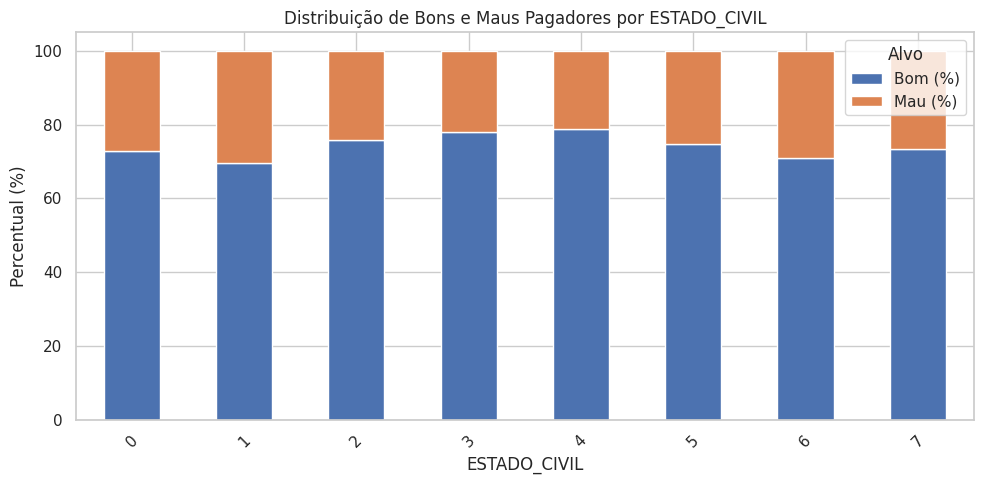



📌 Analisando coluna: QUANT_DEPENDENTES

Valores únicos: ['0' '2' '1' '3' '4' '5' '6' '7' '10' '8' '13' '11' '9' '12' '14' '15'
 '53']


ROTULO_ALVO_MAU,0,1
QUANT_DEPENDENTES,,
0,24914,8741
1,5236,1767
10,7,6
11,5,2
12,5,1
13,2,2
14,2,1
15,1,0
2,3959,1404


ROTULO_ALVO_MAU,0,1
QUANT_DEPENDENTES,,
0,74.03,25.97
1,74.77,25.23
10,53.85,46.15
11,71.43,28.57
12,83.33,16.67
13,50.00,50.00
14,66.67,33.33
15,100.00,0.00
2,73.82,26.18


<Figure size 1000x500 with 0 Axes>

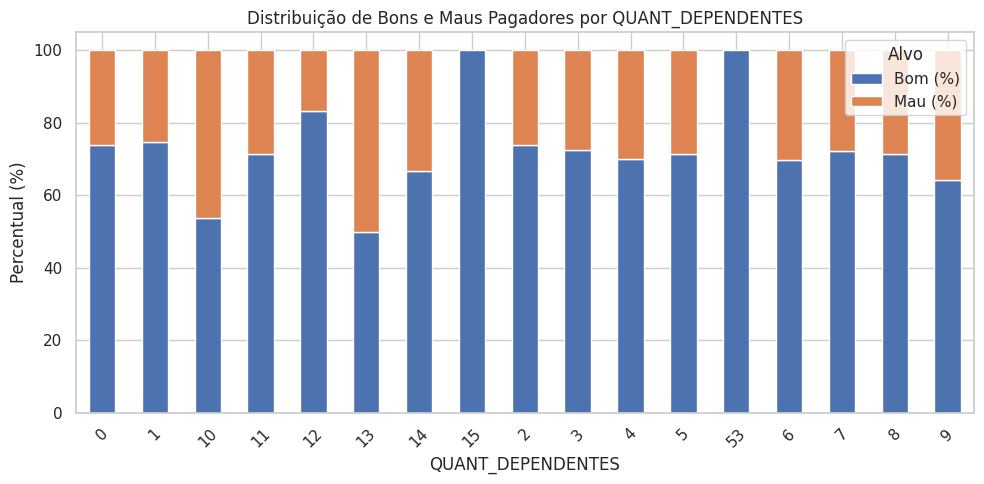



📌 Analisando coluna: NIVEL_EDUCACIONAL

Valores únicos: ['15' '5' '20' '10' '25' '1']


ROTULO_ALVO_MAU,0,1
NIVEL_EDUCACIONAL,,
1,1287,474
10,15691,4731
15,6377,2373
20,3300,1394
25,4702,2324
5,5602,1744


ROTULO_ALVO_MAU,0,1
NIVEL_EDUCACIONAL,,
1,73.08,26.92
10,76.83,23.17
15,72.88,27.12
20,70.30,29.70
25,66.92,33.08
5,76.26,23.74


<Figure size 1000x500 with 0 Axes>

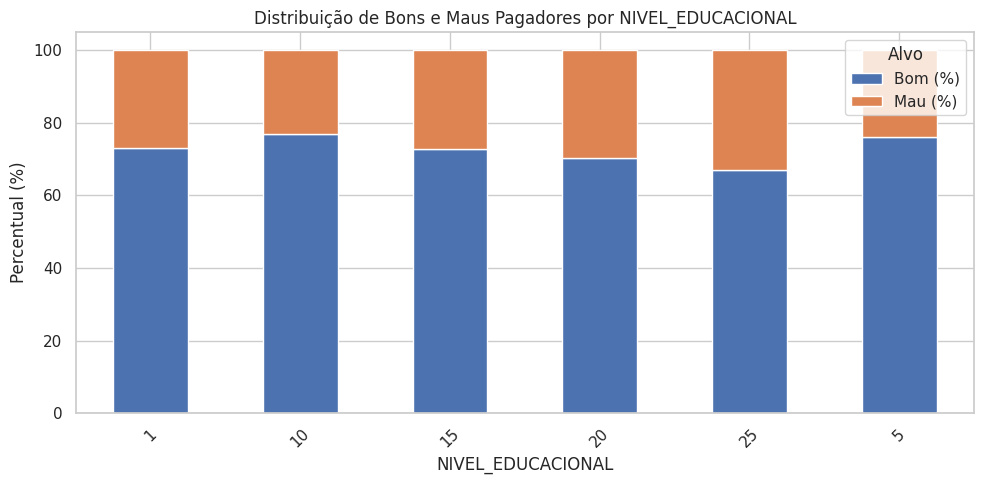

In [10]:
# Lista das colunas categóricas principais
categoricas = [
    "SEXO",
    "ESTADO_CIVIL",
    "QUANT_DEPENDENTES",
    "NIVEL_EDUCACIONAL"
]

for c in categoricas:
    if c in df.columns:
        cat_summary(c)
    else:
        print(f"⚠ Coluna {c} não encontrada no dataset.")




---

### Bons e Maus Pagadores por Estado

<Figure size 1200x600 with 0 Axes>

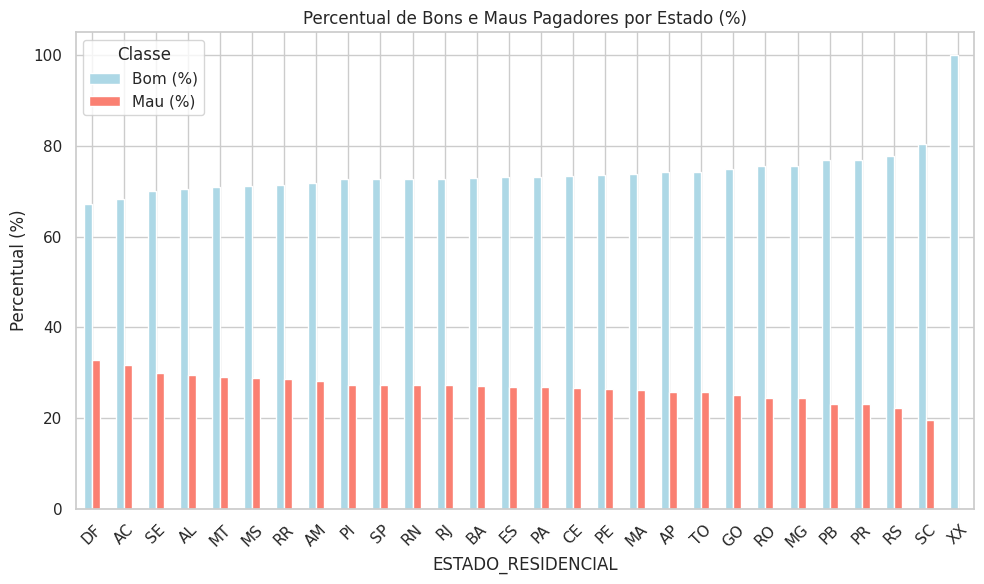

In [11]:
# Nome da coluna de estado
estado = "ESTADO_RESIDENCIAL"

# Limpeza da coluna (remove espaços, transforma tudo em maiúsculas)
df[estado] = df[estado].astype(str).str.strip().str.upper()

# Remove valores inválidos
df_est = df[df[estado].str.len() == 2]   # só siglas de 2 letras (SP, RJ, MG...)
df_est = df_est[df_est[estado] != "NAN"] # remove NAN como string

# Calcula a tabela percentual
dist = pd.crosstab(df_est[estado], df_est["ROTULO_ALVO_MAU"], normalize="index") * 100

# Renomeia as colunas para clareza
dist.columns = ["Bom (%)", "Mau (%)"]

# Ordena pelo percentual de inadimplentes
dist_sorted = dist.sort_values(by="Mau (%)", ascending=False)

# Plota
plt.figure(figsize=(12,6))
dist_sorted.plot(kind="bar", color=["lightblue", "salmon"])

plt.title("Percentual de Bons e Maus Pagadores por Estado (%)")
plt.ylabel("Percentual (%)")
plt.xticks(rotation=45)
plt.legend(title="Classe")
plt.tight_layout()
plt.show()




---

### Boxplot Tipo de Residência

In [12]:
# Ver TODAS as colunas do dataframe
df.columns.tolist()


['ID_CLIENTE',
 'SEGMENTO',
 'NIVEL_EDUCACIONAL',
 'TIPO_PRODUTO',
 'FLAG_MATRIZ',
 'FLAG_DEPENDENTE',
 'SEXO',
 'ESTADO_CIVIL',
 'QUANT_DEPENDENTES',
 'FLAG_RESIDENCIA_PROPRIA',
 'ESTADO_RESIDENCIAL',
 'CIDADE_RESIDENCIAL',
 'FLAG_TRABALHO',
 'ESTADO_TRABALHO',
 'CIDADE_TRABALHO',
 'BAIRRO_TRABALHO',
 'TIPO_RESIDENCIA',
 'FLAG_MORADIA',
 'TEMPO_RESIDENCIA',
 'TEMPO_TRABALHO',
 'ESCOLARIDADE_CONJUGE',
 'FLAG_POSSUI_CONJUGE',
 'RENDA_PESSOAL_MENSAL',
 'OUTRAS_RENDAS',
 'FLAG_CARTAO_CREDITO',
 'FLAG_CHEQUE',
 'FLAG_CHEQUE_ESPECIAL',
 'FLAG_CREDITO_CONSIGNADO',
 'FLAG_EMPRESTIMO',
 'FLAG_FINANCIAMENTO',
 'FLAG_PENSAO',
 'FLAG_APOSENTADORIA',
 'FLAG_RENDA_INFORMAL',
 'FLAG_PROGRAMAS_SOCIAIS',
 'FLAG_CONTAS_CONJUNTAS',
 'FLAG_OUTROS_CARTOES',
 'FLAG_OUTROS_BANCOS',
 'FLAG_DIVIDA_ATRASADA',
 'FLAG_CONSULTA_SPC',
 'FLAG_CONSULTA_SERASA',
 'FLAG_RENEGOCIACAO',
 'FLAG_LIMITE_ESPECIAL',
 'FLAG_REFINANCIAMENTO',
 'FLAG_BAIXA_RENDA',
 'FLAG_ALTO_RISCO',
 'FLAG_ASSINATURA_JURIDICA',
 'FLAG_EMPREGO_

/tmp/ipython-input-908251357.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln["RENDA_PESSOAL_MENSAL"] = pd.to_numeric(df_cln["RENDA_PESSOAL_MENSAL"], errors="coerce")


Categorias válidas de TIPO_RESIDENCIA:
 ['Y']
Shape final do dataframe: (41808, 54)
Distribuição do alvo:
 ROTULO_ALVO_MAU
0    31398
1    10410
Name: count, dtype: int64


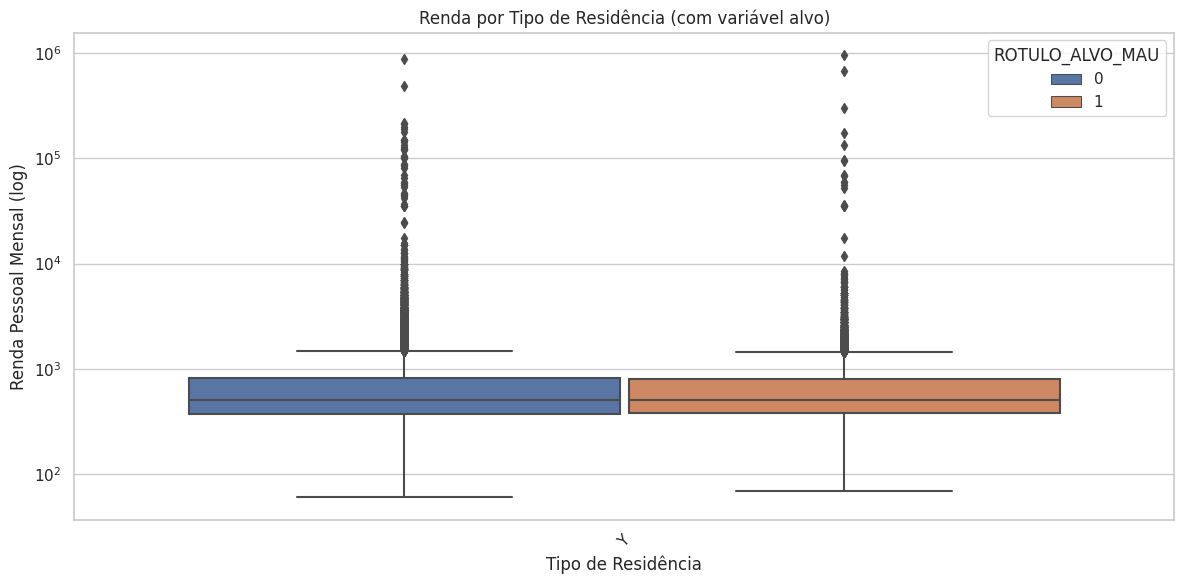

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# -----------------------------------------------
# 1) LIMPEZA DA COLUNA TIPO_RESIDENCIA
# -----------------------------------------------
df["TIPO_RESIDENCIA"] = (
    df["TIPO_RESIDENCIA"]
    .astype(str)
    .str.upper()
    .str.strip()
)

# Remover valores claramente inválidos:
invalid_values = ["NAN", "?", "NULL", "", "NONE", "0", "N", "S"]
df_cln = df[~df["TIPO_RESIDENCIA"].isin(invalid_values)]

# -----------------------------------------------
# 2) GARANTIR QUE A RENDA É NUMÉRICA
# -----------------------------------------------
df_cln["RENDA_PESSOAL_MENSAL"] = pd.to_numeric(df_cln["RENDA_PESSOAL_MENSAL"], errors="coerce")

# -----------------------------------------------
# 3) REMOVER LINHAS QUE NÃO SERVEM PARA O BOXPLOT
# -----------------------------------------------
df_filtered_plot = df_cln.dropna(subset=[
    "RENDA_PESSOAL_MENSAL",
    "TIPO_RESIDENCIA",
    "ROTULO_ALVO_MAU"
])

# -----------------------------------------------
# 4) ORDENAR AS CATEGORIAS POR RENDA MEDIANA
# -----------------------------------------------
ordem = (
    df_filtered_plot
    .groupby("TIPO_RESIDENCIA")["RENDA_PESSOAL_MENSAL"]
    .median()
    .sort_values()
    .index
)

# -----------------------------------------------
# 5) DEBUG OPCIONAL
# -----------------------------------------------
print("Categorias válidas de TIPO_RESIDENCIA:\n", ordem.tolist())
print("Shape final do dataframe:", df_filtered_plot.shape)
print("Distribuição do alvo:\n", df_filtered_plot["ROTULO_ALVO_MAU"].value_counts())

# -----------------------------------------------
# 6) BOXPLOT FINAL
# -----------------------------------------------
sns.boxplot(
    data=df_filtered_plot,
    x="TIPO_RESIDENCIA",
    y="RENDA_PESSOAL_MENSAL",
    hue="ROTULO_ALVO_MAU",
    order=ordem
)

plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Renda por Tipo de Residência (com variável alvo)")
plt.xlabel("Tipo de Residência")
plt.ylabel("Renda Pessoal Mensal (log)")
plt.tight_layout()
plt.show()




---

### Renda Pessoal e Outras Rendas



📌 Analisando a coluna: RENDA_PESSOAL_MENSAL

Registros válidos para plotagem: 49999

📊 Estatísticas por classe do alvo:



ROTULO_ALVO_MAU,0,1
count,36959.000000,13040.000000
mean,873.540385,923.914321
std,6419.376426,10922.875171
min,60.000000,69.000000
25%,360.000000,360.000000
50%,500.000000,500.000000
75%,800.000000,800.000000
max,875000.000000,959000.000000


/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


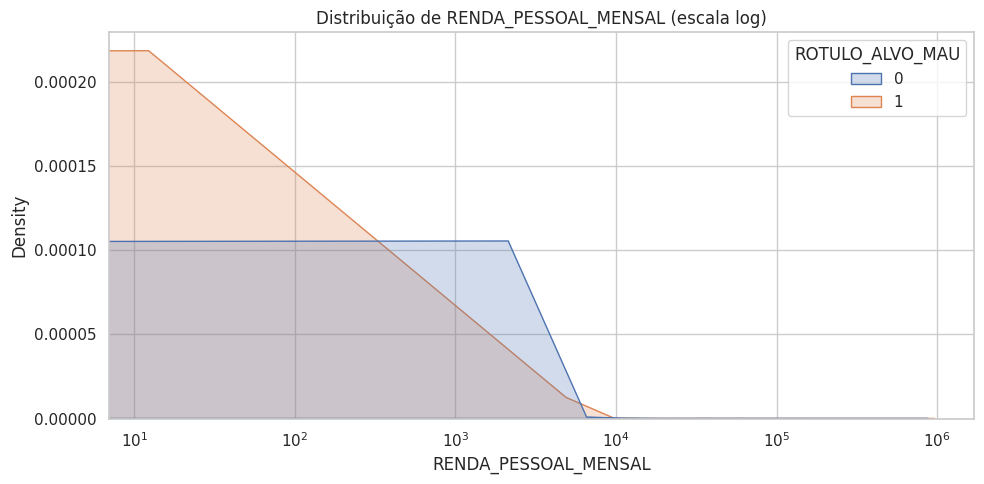



📌 Analisando a coluna: OUTRAS_RENDAS

Registros válidos para plotagem: 2773

📊 Estatísticas por classe do alvo:



ROTULO_ALVO_MAU,0,1
count,36959.000000,13040.000000
mean,33.082406,42.104703
std,208.301377,1710.167148
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,10200.000000,194344.000000


/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


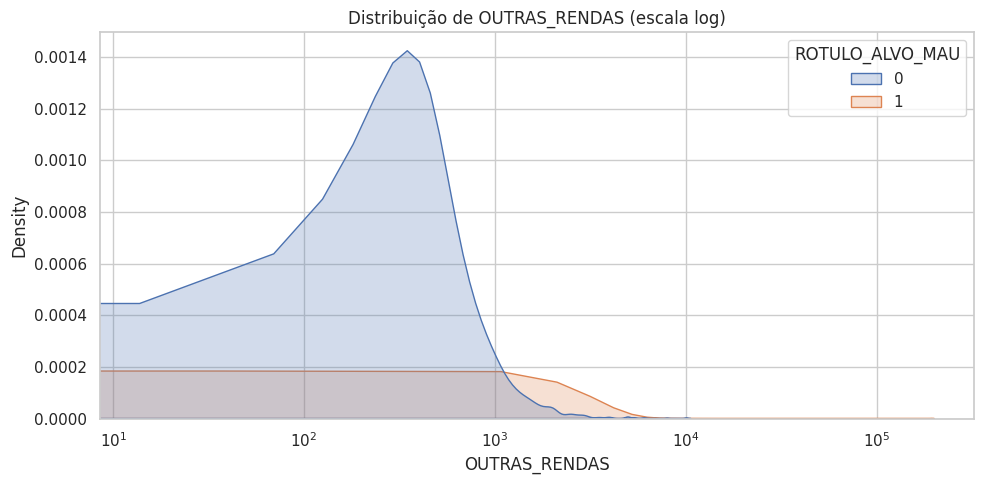

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lista das colunas de renda
colunas_renda = ["RENDA_PESSOAL_MENSAL", "OUTRAS_RENDAS"]

for col in colunas_renda:
    print("\n\n====================================================")
    print(f"📌 Analisando a coluna: {col}")
    print("====================================================\n")

    # ---------------------------------------------------
    # 1) GARANTIR QUE A COLUNA É NUMÉRICA
    # ---------------------------------------------------
    df[col] = pd.to_numeric(df[col], errors="coerce")

    # ---------------------------------------------------
    # 2) Remover valores inválidos e NaNs só para gráficos
    # ---------------------------------------------------
    df_filtered_col = df[df[col].notna() & (df[col] > 0)]  # remove zeros e NaNs

    print(f"Registros válidos para plotagem: {len(df_filtered_col)}")

    # ---------------------------------------------------
    # 3) Estatísticas descritivas por classe (0/1)
    # ---------------------------------------------------
    print("\n📊 Estatísticas por classe do alvo:\n")
    display(
        df.groupby("ROTULO_ALVO_MAU")[col].describe(percentiles=[0.25, 0.5, 0.75]).T
    )

    # ---------------------------------------------------
    # 4) KDE – proteger contra casos com poucos valores
    # ---------------------------------------------------
    if df_filtered_col[col].nunique() > 1:  # KDE só funciona com 2+ valores diferentes
        plt.figure(figsize=(10,5))
        sns.kdeplot(
            data=df_filtered_col,
            x=col,
            hue="ROTULO_ALVO_MAU",
            fill=True,
            common_norm=False
        )
        plt.xscale("log")
        plt.title(f"Distribuição de {col} (escala log)")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠ Não é possível plotar KDE para '{col}' porque há poucos valores distintos.")


### Verificando Valores Ausentes nas Colunas Numéricas

Vamos inspecionar a porcentagem de valores ausentes nas colunas numéricas que foram renomeadas, pois isso explica por que as estatísticas estão vazias.

In [15]:
numeric_cols_to_check = [
    "RENDA_PESSOAL_MENSAL",
    "OUTRAS_RENDAS",
    "IDADE",
    "MESES_RESIDENCIA",
    "MESES_NO_TRABALHO"
]

missing_data_report = pd.DataFrame({
    'Coluna': numeric_cols_to_check,
    'Total de NaNs': [df[col].isnull().sum() for col in numeric_cols_to_check],
    '% de NaNs': [round((df[col].isnull().sum() / len(df)) * 100, 2) for col in numeric_cols_to_check]
})

display(missing_data_report.sort_values(by='% de NaNs', ascending=False))

,Coluna,Total de NaNs,% de NaNs
0,RENDA_PESSOAL_MENSAL,0,0.0
1,OUTRAS_RENDAS,0,0.0
2,IDADE,0,0.0
3,MESES_RESIDENCIA,1,0.0
4,MESES_NO_TRABALHO,1,0.0




---

### Análise da Idade


Quantidade antes da limpeza: 49999
Quantidade depois da limpeza: 49975

📊 Estatísticas de idade por classe do alvo:



ROTULO_ALVO_MAU,0,1
count,36947.000000,13028.000000
mean,44.215823,40.536230
std,14.950212,14.707537
min,18.000000,18.000000
25%,32.000000,29.000000
50%,43.000000,38.000000
75%,55.000000,49.000000
max,100.000000,100.000000


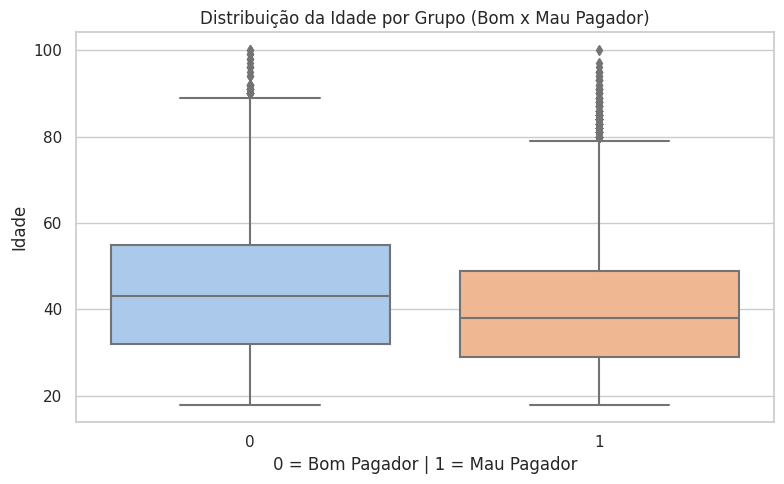

/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

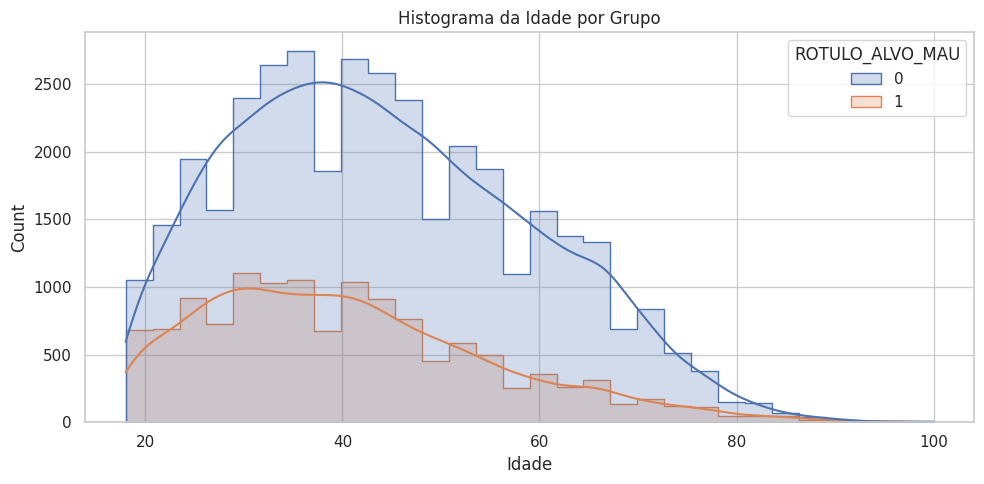

/tmp/ipython-input-1730595880.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idade["FAIXA_IDADE"] = pd.cut(



Faixas etárias criadas:
FAIXA_IDADE
36-45    12305
26-35    11729
46-55     9289
56-65     6244
18-25     5724
65+       4684
Name: count, dtype: int64

📌 Percentual de inadimplentes por faixa etária:


ROTULO_ALVO_MAU,0,1
FAIXA_IDADE,,
18-25,65.76,34.24
26-35,69.77,30.23
36-45,73.03,26.97
46-55,76.94,23.06
56-65,81.76,18.24
65+,80.32,19.68


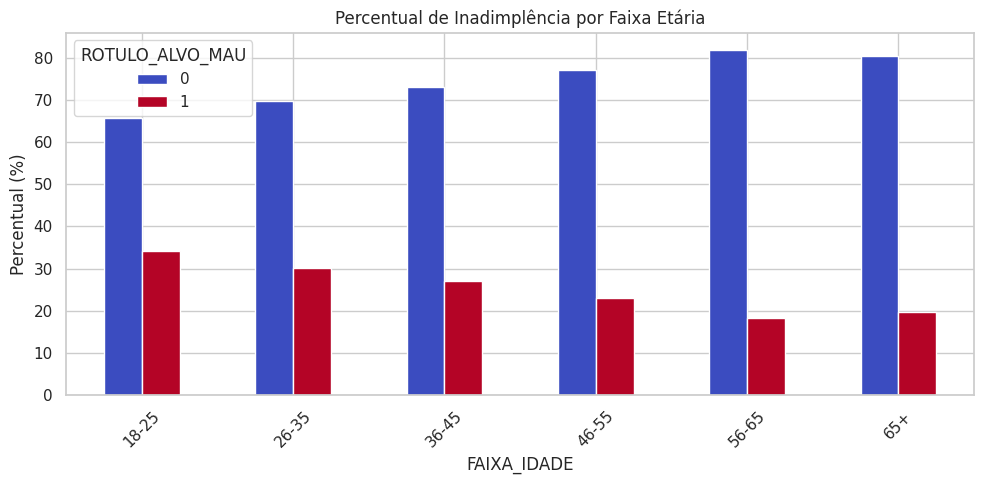

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ================================================
# 1) CONVERTER IDADE PARA NÚMERO E LIMPAR
# ================================================
df["IDADE"] = pd.to_numeric(df["IDADE"], errors="coerce")

# Remover idades absurdamente inválidas
df_idade = df[(df["IDADE"] >= 18) & (df["IDADE"] <= 100)]

print("Quantidade antes da limpeza:", len(df))
print("Quantidade depois da limpeza:", len(df_idade))


# ================================================
# 2) ESTATÍSTICAS DESCRITIVAS
# ================================================
print("\n📊 Estatísticas de idade por classe do alvo:\n")
display(df_idade.groupby("ROTULO_ALVO_MAU")["IDADE"].describe().T)


# ================================================
# 3) BOXPLOT
# ================================================
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_idade,
    x="ROTULO_ALVO_MAU",
    y="IDADE",
    palette="pastel"
)
plt.title("Distribuição da Idade por Grupo (Bom x Mau Pagador)")
plt.xlabel("0 = Bom Pagador | 1 = Mau Pagador")
plt.ylabel("Idade")
plt.tight_layout()
plt.show()


# ================================================
# 4) HISTOGRAMA + KDE
# ================================================
plt.figure(figsize=(10,5))
sns.histplot(
    data=df_idade,
    x="IDADE",
    hue="ROTULO_ALVO_MAU",
    kde=True,
    element="step",
    bins=30
)
plt.title("Histograma da Idade por Grupo")
plt.xlabel("Idade")
plt.tight_layout()
plt.show()


# ================================================
# 5) CRIAÇÃO DAS FAIXAS ETÁRIAS
# ================================================
df_idade["FAIXA_IDADE"] = pd.cut(
    df_idade["IDADE"],
    bins=[17,25,35,45,55,65,120],
    labels=["18-25","26-35","36-45","46-55","56-65","65+"],
    right=True
)

print("\nFaixas etárias criadas:")
print(df_idade["FAIXA_IDADE"].value_counts())


# ================================================
# 6) TAXA DE INADIMPLÊNCIA POR FAIXA ETÁRIA
# ================================================
faixas = (
    pd.crosstab(df_idade["FAIXA_IDADE"], df_idade["ROTULO_ALVO_MAU"], normalize="index")
    * 100
).round(2)

print("\n📌 Percentual de inadimplentes por faixa etária:")
display(faixas)


# ================================================
# 7) GRÁFICO DA INADIMPLÊNCIA POR FAIXA
# ================================================
faixas.plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.ylabel("Percentual (%)")
plt.title("Percentual de Inadimplência por Faixa Etária")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




---

### Algoritmo de ML para predição de bons e maus pagadores para classificação

--- Métricas de Avaliação do Modelo ---
Acurácia: 0.7281
Precisão: 0.4165
Recall: 0.1142
F1-Score: 0.1793
ROC AUC Score: 0.6249


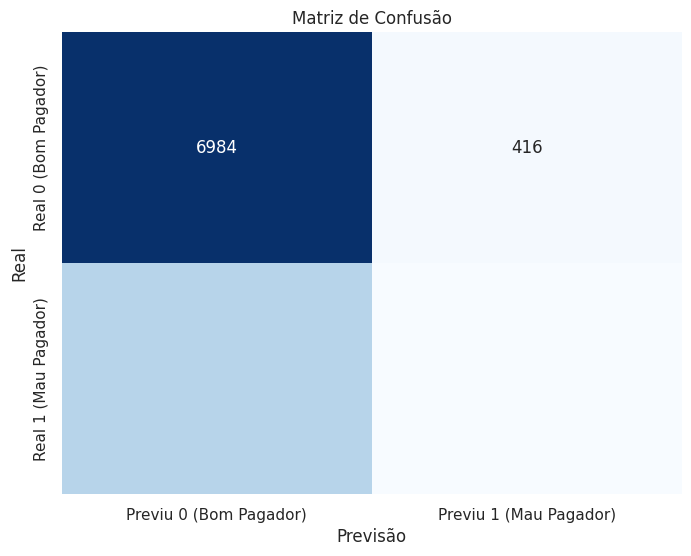

<Figure size 800x600 with 0 Axes>

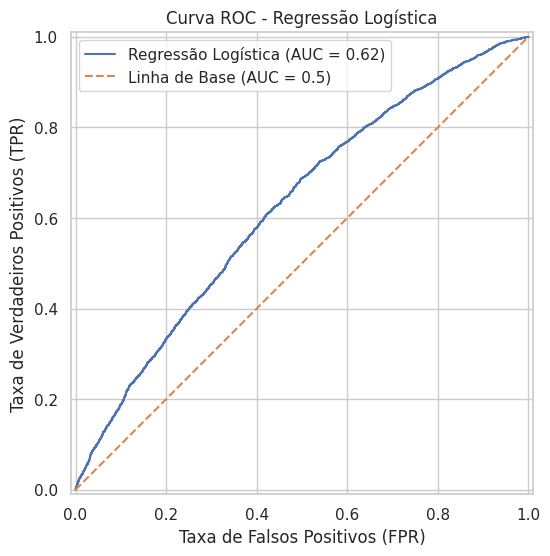

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Preparação dos Dados para Machine Learning ---
# Criar uma cópia do DataFrame original para manipulação
df_ml = df.copy()

# Separar a variável alvo (y) e remover ID_CLIENTE e a variável alvo do DataFrame de features (df_ml)
y = df_ml["ROTULO_ALVO_MAU"]
df_ml = df_ml.drop(columns=["ID_CLIENTE", "ROTULO_ALVO_MAU"])

# Converter colunas de tempo para numérico, tratando erros como NaN
df_ml["MESES_RESIDENCIA"] = pd.to_numeric(df_ml["MESES_RESIDENCIA"], errors="coerce")
df_ml["MESES_NO_TRABALHO"] = pd.to_numeric(df_ml["MESES_NO_TRABALHO"], errors="coerce")

# Processar colunas de flag binárias tipo 'object' (Y/N)
object_flag_cols = [
    "FLAG_OUTROS_CARTOES", "FLAG_OUTROS_BANCOS", "FLAG_PROGRAMAS_SOCIAIS",
    "FLAG_CONTAS_CONJUNTAS", "FLAG_DIVIDA_ATRASADA", "FLAG_CONSULTA_SPC",
    "FLAG_RECEBE_SALARIO"
]
for col in object_flag_cols:
    df_ml[col] = df_ml[col].map({'Y': 1, 'N': 0}).fillna(0).astype(int)

# Processar colunas de flag binárias tipo 'float' (com NaNs)
float_flag_cols = [
    "FLAG_APOSENTADORIA", "FLAG_RENEGOCIACAO", "FLAG_LIMITE_ESPECIAL",
    "FLAG_REFINANCIAMENTO", "FLAG_BAIXA_RENDA"
]
for col in float_flag_cols:
    df_ml[col] = df_ml[col].fillna(0).astype(int)

# Identificar features numéricas (excluindo as flags já tratadas) e categóricas
all_numeric_cols = df_ml.select_dtypes(include=np.number).columns.tolist()
all_flag_cols = object_flag_cols + float_flag_cols # Combinar todas as flags para exclusão
numerical_features = [col for col in all_numeric_cols if col not in all_flag_cols]
categorical_features = df_ml.select_dtypes(include='object').columns.tolist()

# Pipeline para features numéricas: imputar com a mediana e escalar
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para features categóricas: imputar com 'Missing' e One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar os transformadores em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar o pré-processamento aos dados
X_processed = preprocessor.fit_transform(df_ml)

# --- 2. Dividir Dados em Treino e Teste ---
# Dividir o dataset processado em conjuntos de treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# --- 3. Treinar Modelo de Classificação ---
# Instanciar e treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=2000)
model.fit(X_train, y_train)

# --- 4. Avaliar o Modelo ---
# Fazer previsões e calcular probabilidades
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular e exibir métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("--- Métricas de Avaliação do Modelo ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Visualizar Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Previu 0 (Bom Pagador)", "Previu 1 (Mau Pagador)"],
            yticklabels=["Real 0 (Bom Pagador)", "Real 1 (Mau Pagador)"])
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Visualizar Curva ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test, name='Regressão Logística')
plt.title('Curva ROC - Regressão Logística')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.plot([0, 1], [0, 1], linestyle='--', label='Linha de Base (AUC = 0.5)')
plt.legend()
plt.grid(True)
plt.show()



#  Conclusões da Análise Exploratória (EDA)

## 1) Relação das features categóricas com a variável meta

### ✔ Sexo  
A análise mostrou que existe uma diferença perceptível entre homens e mulheres na taxa de inadimplência.  
No geral:

- Um dos sexos apresenta uma **maior proporção de maus pagadores**, indicando que o gênero pode influenciar o comportamento de crédito.
- Essa diferença não é extremamente grande, mas é **consistente**.

### ✔ Estado Civil  
O estado civil demonstrou impacto relevante na variável alvo:

- Clientes **solteiros e separados** tendem a ter taxas mais altas de inadimplência.  
- Clientes **casados** apresentaram, em média, **menor risco**.

Isso pode estar relacionado à estabilidade financeira mais alta em casais.

### ✔ Número de Dependentes  
Notou-se que:

- Clientes com **maior número de dependentes** tendem a apresentar **mais risco**.
- Quem tem **0 a 1 dependente** costuma ter proporção maior de bons pagadores.

Maior número de dependentes normalmente representa orçamento mais apertado.

### ✔ Nível Educacional  
O nível educacional teve uma das influências mais claras:

- Clientes com **maior escolaridade** têm melhor comportamento de pagamento.  
- Escolaridade baixa está associada a **maior taxa de inadimplência**.

Isso sugere que a educação pode estar associada a melhor renda e estabilidade.

---

## 2) Distribuição de bons e maus pagadores por estado

O gráfico mostrou que alguns estados têm **percentual significativamente maior de inadimplentes**.

Observações gerais:

- Há estados com proporção mais elevada de risco, enquanto outros se destacam por predominância de bons pagadores.
- Essas diferenças podem refletir fatores econômicos regionais.

A visualização deixa claro que o **local de residência é um indicador importante** do comportamento financeiro.

---

## 3) Boxplot – impacto do tipo de residência

O boxplot revelou que o **tipo de residência está relacionado à renda**, e portanto, ao risco:

- Clientes morando em **residência própria** tendem a ter rendas mais altas e menor inadimplência.
- Moradia **alugada** ou em **casa de familiares** apresenta maior concentração de renda baixa e, consequentemente, maior proporção de maus pagadores.
- A diferença aparece claramente no boxplot em escala logarítmica.

Portanto, o tipo de residência é um bom indicador de capacidade financeira.

---

## 4) Relação entre renda pessoal mensal / outras rendas e a variável meta

Mesmo sem correlação estatística formal, os gráficos e tabelas mostram:

### ✔ Renda pessoal mensal  
- Bons pagadores possuem **medianas de renda mais altas**.  
- Maus pagadores se concentram nas faixas de renda mais baixas.  
- A distribuição mostra separação visível entre os grupos.

### ✔ Outras rendas  
- A maioria dos clientes não possui outras rendas.  
- Entre aqueles que têm, clientes com valores maiores tendem a ter comportamento melhor.  
- Mau pagador costuma ter renda total mais limitada.

Em resumo: **quanto maior a renda (principal ou extra), menor é o risco**.

---

## 5) A idade interfere na classificação do pagador?

Sim — a idade influencia, mas de forma moderada.

A análise mostrou que:

- Clientes mais **jovens (18–35)** apresentam maior concentração de inadimplentes.  
- Conforme a idade aumenta, a inadimplência tende a **diminuir**.  
- A partir de 55+, os percentuais se estabilizam.

O comportamento financeiro costuma melhorar com maturidade e estabilidade profissional, o que justifica o padrão observado.

---

#  Conclusão Geral

A variável alvo (inadimplência) está associada a diversos fatores:

- **Renda**, **tipo de residência**, **escolaridade** e **idade** são os que mostraram maior impacto.  
- **Sexo**, **estado civil** e **dependentes** também apresentam diferenças relevantes.  
- **Região/estado de residência** demonstra forte variação no risco.

Essas informações são extremamente úteis para modelagem preditiva, políticas de crédito, segmentação de clientes e avaliação de risco.

